In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.runs import runstest_1samp 

In [2]:
# Checking the features of the dataset
df = pd.read_excel(r'C:\Users\Amol Saket\Desktop\IPL data set.xlsx', sheet_name='Sheet2')
df['intercept']=1
print(df)

                  Name   firstname   lastname  Mat  Inns  NO  Runs  HS    Avg  \
0          aaron finch       aaron      finch   10     9   1   134  46  16.75   
1       ab de villiers          ab   villiers   12    11   2   480  90  53.33   
2      abhishek sharma    abhishek     sharma    3     3   2    63  46  63.00   
3       ajinkya rahane     ajinkya     rahane   15    14   1   370  65  28.46   
4      akila dananjaya       akila  dananjaya    1     1   1     4   4   0.00   
..                 ...         ...        ...  ...   ...  ..   ...  ..    ...   
133  washington sundar  washington     sundar    7     6   3    65  35  21.66   
134    wriddhiman saha  wriddhiman       saha   11    10   2   122  35  15.25   
135       yusuf pathan       yusuf     pathan   15    13   4   260  45  28.88   
136       yuvraj singh      yuvraj      singh    8     6   0    65  20  10.83   
137   yuzvendra chahal   yuzvendra     chahal   14     1   1     0   0   0.00   

      BF      SR  100s  50s

In [3]:
# Calculating the numerology score of every player
firstnames = df['firstname'].to_list()
sum = 0
score = []
name=""
for index,firstname in enumerate(firstnames):
    for char in firstname:
        sum += ord(char) - 96 # 96 is the unicode value of character 'a'
        name += char
    score.append(sum)
    print(name, sum)
    name=""
    sum = 0
df['numerology_score'] = pd.Series(data = score)


aaron 49
ab 3
abhishek 63
ajinkya 71
akila 34
akshdeep 69
alex 42
ambati 46
amit 43
andre 42
andrew 65
ankit 55
anureet 84
axar 44
barinder 71
basil 43
ben 21
ben 21
ben 21
bhuvneshwar 141
billy 60
brendon 72
carlos 68
chris 57
chris 57
chris 57
chris 57
colin 53
colin 53
corey 66
dan 19
darcy 51
david 40
deepak 42
deepak 42
dhawal 49
dhruv 73
dinesh 59
dwayne 72
evin 50
faf 13
gautam 63
glenn 52
harbhajan 63
hardik 51
harshal 67
heinrich 74
imran 55
ish 36
ishan 51
jason 59
jasprit 93
javon 62
jaydev 67
jofra 50
jos 44
jp 26
kanewilliamson 158
karun 65
kedar 39
kieron 72
kl 23
krishnappa 113
krunal 77
kuldeep 74
liam 35
mahipal 60
manan 43
mandeep 58
manish 64
manoj 53
marcus 75
mark 43
mayank 65
mayank 65
mitchell 82
mitchell 82
moeen 52
mohammad 68
mohammad 68
mohammed 72
mohit 65
ms 32
mujeeb 56
murali 74
murugan 95
mustafizur 154
naman 43
nitish 79
parthiv 94
pawan 55
piyush 98
pradeep 65
prashant 97
prasidh 75
prithvi 102
quinton 110
rahul 60
rahul 60
rashid 59
ravichandran 113
r

In [6]:
x = df[['intercept','Runs', 'Avg', 'SR','4s','6s','numerology_score']]
print(x)

     intercept  Runs    Avg      SR  4s  6s  numerology_score
0            1   134  16.75  134.00   6  28                49
1            1   480  53.33  174.54  39   8                 3
2            1    63  63.00  190.90   3  30                63
3            1   370  28.46  118.21  39   5                71
4            1     4   0.00   80.00   0   5                34
..         ...   ...    ...     ...  ..  ..               ...
133          1    65  21.66  171.05   5   4               130
134          1   122  15.25  119.60  17   1               103
135          1   260  28.88  130.00  22  11                92
136          1    65  10.83   89.04   6   2                97
137          1     0   0.00    0.00   0   0               136

[138 rows x 7 columns]


In [5]:
y = df['auction_price']
print(y)

0      6.20
1      6.20
2      0.55
3      4.00
4      0.50
       ... 
133    3.20
134    5.00
135    1.90
136    2.00
137    6.00
Name: auction_price, Length: 138, dtype: float64


In [ ]:
# Question 1:

In [7]:
# Regression 1: 'auction_price' VS 'Runs, Avg, SR, 4s, 6s'
x = df[['intercept','Runs', 'Avg', 'SR','4s','6s']]
reg1 = sm.OLS(y.astype(float), x.astype(float)).fit()
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:          auction_price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.243
Date:                Sat, 27 Nov 2021   Prob (F-statistic):              0.292
Time:                        20:00:33   Log-Likelihood:                -348.13
No. Observations:                 138   AIC:                             708.3
Df Residuals:                     132   BIC:                             725.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8970      0.663      4.367      0.0

BP test for heteroscedasticity: {'LM Statistic': 3.118200963289073, 'LM-Test p-value': 0.6817685066548862, 'F-Statistic': 0.6103158915342323, 'F-Test p-value': 0.6921374190338841}

White's Test for heteroscedasticity: {'LM Statistic': 12.129121719544155, 'LM-Test p-value': 0.9115599877669662, 'F-Statistic': 0.5637154759597055, 'F-Test p-value': 0.9299827498991529}

Runs test for autocorrelation:  {'statistic': -1.7473707333491633, 'p-value': 0.08057305072797875}


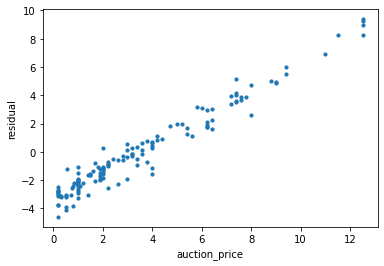

In [11]:
residual_reg1 = reg1.resid
plt.scatter(df['auction_price'].astype(float),residual_reg1,s=10)
plt.xlabel('auction_price')
plt.ylabel('residual')

# running test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

white_test = het_white(residual_reg1,  reg1.model.exog)
bp_test = het_breuschpagan(residual_reg1, x)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print("BP test for heteroscedasticity:", dict(zip(labels, bp_test)))
print()
print("White's Test for heteroscedasticity:", dict(zip(labels, white_test)))
print()
print("Runs test for autocorrelation: ", dict(zip(['statistic','p-value'],runstest_1samp(residual_reg1, correction=False))))


# RESULTS:

# In both the heteroscedasticity tests, p-values are quite high(>0.1 even for 10% significance level). Hence, we dont have 
# evidence to conclude that data is heteroscedastic.

# From the scatter plot, clearly the data looks homoscedastic as the variability of data is similar for each value along x-axis.

# But the residual increases with increase in 'auction_price'. This is because of endogeneity problem caused due to omission 
# of a significant variable that is positively correlated with 'auction_price'.(specification bias)

# There is no autocorrelation, as p-value in Runs test is 0.08; This is insignificant at 5% level.


In [ ]:
########################################## Question 1 ends here################################################################

In [ ]:
# Question 2 : 

In [15]:
# Regression 2: 'auction price' VS all variables including numerology_score
x = df[['intercept','Runs', 'Avg', 'SR','4s','6s', 'numerology_score','Mat','Inns','NO','HS','BF','100s','50s']]
reg2 = sm.OLS(y.astype(float), x.astype(float)).fit()
print(reg2.summary())
# Residuals of this regression will be used in regression-4 to compute weights for correction of heteroscedasticity.

                            OLS Regression Results                            
Dep. Variable:          auction_price   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     2.451
Date:                Sat, 27 Nov 2021   Prob (F-statistic):            0.00540
Time:                        20:43:29   Log-Likelihood:                -335.53
No. Observations:                 138   AIC:                             699.1
Df Residuals:                     124   BIC:                             740.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.3611      0.986  

BP test for heteroscedasticity: {'LM Statistic': 7.434408123691373, 'LM-Test p-value': 0.8276229698882298, 'F-Statistic': 0.5931252650531109, 'F-Test p-value': 0.8444370036817637}

White's Test for heteroscedasticity: {'LM Statistic': 114.95216556516839, 'LM-Test p-value': 0.07008421634235158, 'F-Statistic': 2.2815376176819084, 'F-Test p-value': 0.0016450606404224426}

Runs test for autocorrelation:  {'statistic': -2.400968447886145, 'p-value': 0.016351746354603115}


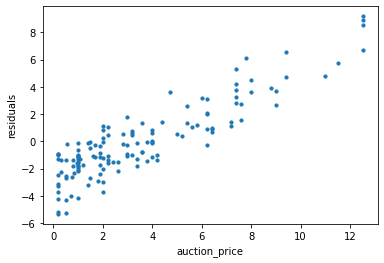

In [20]:
residual_reg2 = reg2.resid
plt.scatter(df['auction_price'].astype(float),residual_reg2,s=10)
plt.xlabel('auction_price')
plt.ylabel('residuals')

# running test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

white_test = het_white(residual_reg2,  reg2.model.exog)
bp_test = het_breuschpagan(residual_reg2, x)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print("BP test for heteroscedasticity:", dict(zip(labels, bp_test)))
print()
print("White's Test for heteroscedasticity:", dict(zip(labels, white_test)))
print()
print("Runs test for autocorrelation: ", dict(zip(['statistic','p-value'],runstest_1samp(residual_reg2, correction=False))))

# RESULTS:

# In white's tests, p-values is 0.07. Hence, at 10% level, there is evidence of some heteroscedasticity.
# Hence we use weighted least squares(WLS) to estimate the coefficients. (Its a borderline case, since BP test suggests lack
# of heteroscedasticity)

# But the residual increases with increase in 'auction_price'. This is because of endogeneity problem caused due to omission 
# of a significant variable that is positively correlated with 'auction_price'.(specification bias)

# There is no autocorrelation, as p-value in Runs test is 0.016; This is insignificant at 1% level.(We used stringent criteria
# to test for autocorrelation, to avoid use of GLS Method.)

In [27]:
# Regression 2-1  : 'auction price' VS all variables without numerology_score
x = df[['intercept','Runs', 'Avg', 'SR','4s','6s','Mat','Inns','NO','HS','BF','100s','50s']]
reg2_1 = sm.OLS(y.astype(float), x.astype(float)).fit()
print(reg2_1.summary())
residual_reg2_1 = reg2_1.resid 
# Residuals of this regression will be used in regression-3 to compute weights for correction of heteroscedasticity.

                            OLS Regression Results                            
Dep. Variable:          auction_price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     2.514
Date:                Sat, 27 Nov 2021   Prob (F-statistic):            0.00540
Time:                        21:05:07   Log-Likelihood:                -336.39
No. Observations:                 138   AIC:                             698.8
Df Residuals:                     125   BIC:                             736.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7033      0.836      0.841      0.4

In [28]:
# Regression 3:  Original model(WLS)
x = df[['intercept','Runs', 'Avg', 'SR','4s','6s','Mat','Inns','NO','HS','BF','100s','50s']]
# The weights are presumed to be (proportional to) the inverse of the variance of the observations. 
# That is, if the variables are to be transformed by 1/sqrt(W) you must supply weights = 1/W.
w = 1/((residual_reg2_1)**2).to_numpy() # Weights 
reg3 = sm.WLS(y.astype(float), x.astype(float), weights=w).fit()
print(reg3.summary())

                            WLS Regression Results                            
Dep. Variable:          auction_price   R-squared:                       0.953
Model:                            WLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     212.8
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           5.10e-77
Time:                        21:05:38   Log-Likelihood:                -227.24
No. Observations:                 138   AIC:                             480.5
Df Residuals:                     125   BIC:                             518.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7642      0.118      6.459      0.0

Text(0, 0.5, 'residuals')

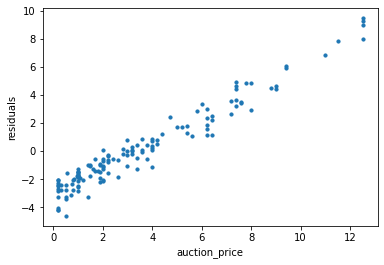

In [243]:
residual_reg3 = reg3.resid
plt.scatter(df['auction_price'].astype(float),residual_reg3,s=10)
plt.xlabel('auction_price')
plt.ylabel('residuals')

In [ ]:
# Using WLS estimators, heteroscedasticity is taken care of. Clearly, the spread of data about the mean
# has reduced. However,the specification bias still persists even after 
# considering all explanatory variables in the data set.

In [31]:
# Regression 4: New model which includes numerology(WLS)
x = df[['intercept','Runs', 'Avg', 'SR','4s','6s', 'numerology_score','Mat','Inns','NO','HS','BF','100s','50s']]
# The weights are presumed to be (proportional to) the inverse of the variance of the observations. 
# That is, if the variables are to be transformed by 1/sqrt(W) you must supply weights = 1/W.
w = 1/((residual_reg2)**2).to_numpy() # Weights 
reg4 = sm.WLS(y.astype(float), x.astype(float), weights=w).fit()
print(reg4.summary())

                            WLS Regression Results                            
Dep. Variable:          auction_price   R-squared:                       0.993
Model:                            WLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1387.
Date:                Sat, 27 Nov 2021   Prob (F-statistic):          1.73e-127
Time:                        21:29:53   Log-Likelihood:                -222.91
No. Observations:                 138   AIC:                             473.8
Df Residuals:                     124   BIC:                             514.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            1.2637      0.104  